# **Analyzing the Impact of Origin Country on YouTube Channel Engagement: A Data-Driven Study**

# **Abstract**

YouTube has become a powerful tool for content creators to reach diverse audiences worldwide. This project explores the relationship between the origin country of YouTube channels and their levels of engagement, measured by metrics like page visits, likes, comments, and overall subscribers. This analysis is looking to answer the casual question "what effect does origin country have on the overall engagement on a YouTube channel?" Each of our confounders are measurable besides the subjective content quality counfounder, which can be inferenced by other relations but cannnot necessarily be quantified as a metric. The colliders concerning this casual question are all significant importance. Cultural events pertaining to a given country (ex. the World Cup, viral phenomena, war, etc.) may increase engagement on channnels orginating from said country, skewing our comparison. Social media promotion is also a big factor since many countries that are being analyzed via this project do not have a great social media base nationally. Our casual question helps drive policy decisions pertaining to content distribution, content censorship, and data privacy. The questions answered in this project will help clarify how being from a certain country can affect your ability to be a succesful video creator. The findings of this project suggest that overall channel engagement is the most important metric for sucess and being from a certain country may affect said metric.

# **Casual Question**

What effect does origin country have on the overall engagement on a YouTube channel?

**Possible Counfounders**

*Language*: The language of the content can be a significant factor. Channels producing content in widely spoken languages might attract a more diverse audience, potentially masking the effect of the origin country.

*Content Quality*: The quality of the content, production values, and entertainment value can influence engagement, and this may vary by country/resources from said country.

*Content Type*: The type of content (e.g., gaming, music, educational) can be a confounder. Different content types may attract different audiences, and these preferences can vary by country.



**Possible Colliders**

*External Events*: Major events or trends (e.g., global sporting events, holidays, news events) can lead to spikes in engagement, and these events can also be correlated with the country of origin.

*Social Media Promotion*: Channels may use social media platforms to promote their content. Engagement on these platforms can be a collider if it varies by the origin country.

*Viewer Behavior*: Viewer behavior on YouTube, such as liking, sharing, and commenting, can be affected by the country's cultural norms and online habits. This can also act as a collider.

# **About the Dataset**

-  Dataset comprises details of the top 1000 YouTube channels
-  Original data, sourced from COMPUTINGVICTOR - Top 1000 Youtubers statistics, had issues such as duplicates and inaccuracies in the 'Country' and 'Genre' columns
- 9 relations, 1000 unique entries
- Gathered from Kaggle

# **Pre-processing**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('/content/Clean_Top_1000_Youtube_df - youtubers_df.csv')

# Display the first few rows of the dataset
print(data.head())

# Get basic information about the dataset
print(data.info())

# Generate summary statistics for numerical columns
print(data.describe())

data.dropna(inplace=True)  # Remove rows with missing values
data['Rank'] = data['Rank'].astype(int)  # Convert rank to integer
data['Suscribers'] = data['Suscribers'].str.replace(',', '', regex=True).astype(int)  # Convert Suscribers to integer
data['Visits'] = data['Visits'].str.replace(',', '', regex=True).astype(int)  # Convert Visits to integer
data['Likes'] = data['Likes'].str.replace(',', '', regex=True).astype(int)  # Convert Likes to integer
data['Comments'] = data['Comments'].str.replace(',', '', regex=True).astype(int)  # Convert Comments to integer

data.drop_duplicates(inplace=True)

# 'Engagement_rate' feature
data['engagement_rate'] = data['Likes'] / data['Visits']

# Final look of dataframe
print(data.info())

display(data)

   Rank       Username     Categories   Suscribers Country       Visits  \
0     1        tseries  Entertainment  249,500,000      IN       86,200   
1     2        MrBeast  Entertainment  183,500,000      US  117,400,000   
2     3      CoComelon          Music  165,500,000      US    7,000,000   
3     4       SETIndia  Entertainment  162,600,000      IN       15,600   
4     5  KidsDianaShow          Hobby  113,500,000      US    3,900,000   

       Likes Comments                                              Links  
0      2,700       78  http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...  
1  5,300,000   18,500  http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...  
2     24,700        0  http://youtube.com/channel/UCbCmjCuTUZos6Inko4...  
3        166        9  http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...  
4     12,400        0  http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 colu

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links,engagement_rate
0,1,tseries,Entertainment,249500000,IN,86200,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...,0.031323
1,2,MrBeast,Entertainment,183500000,US,117400000,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,0.045145
2,3,CoComelon,Music,165500000,US,7000000,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...,0.003529
3,4,SETIndia,Entertainment,162600000,IN,15600,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...,0.010641
4,5,KidsDianaShow,Hobby,113500000,US,3900000,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...,0.003179
...,...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,Food,11700000,KR,397400,14000,124,http://youtube.com/channel/UCPKNKldggioffXPkSm...,0.035229
996,997,Adaahqueen,Film,11700000,IN,1100000,92500,164,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...,0.084091
997,998,LittleAngelIndonesia,Entertainment,11700000,ID,211400,745,0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...,0.003524
998,999,PenMultiplex,Film,11700000,IN,14000,81,1,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...,0.005786


# **Exploratory Data Analysis (EDA)**

<ipython-input-7-ae8bfd4382a1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


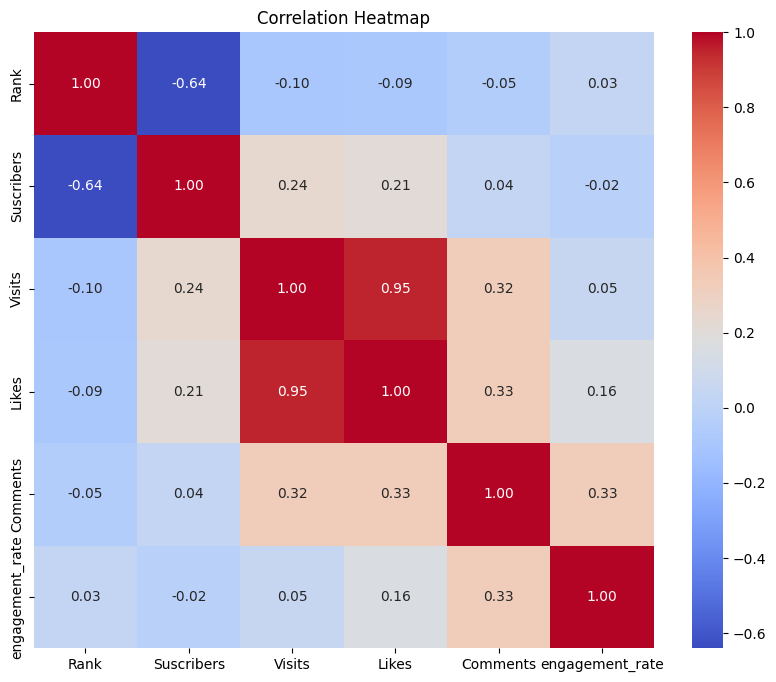

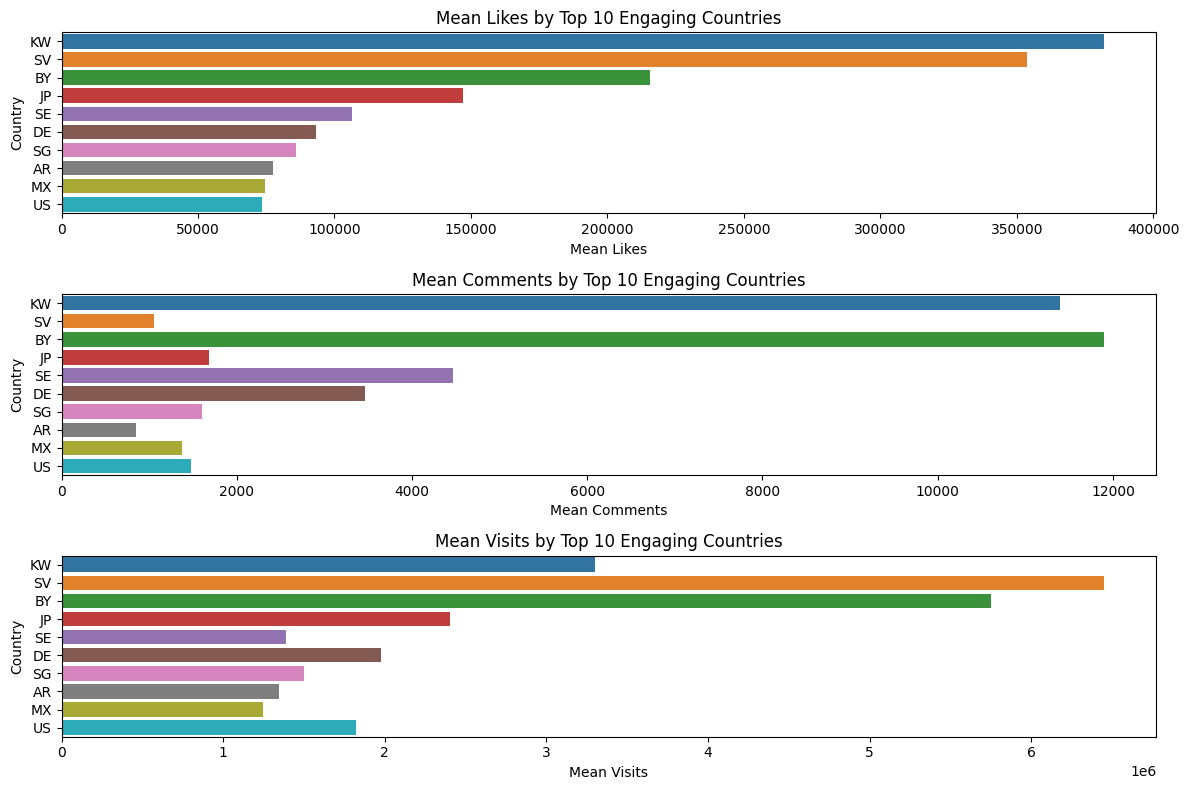

<ipython-input-7-ae8bfd4382a1>:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='engagement_rate', y='Country', data=top_engagement_rate, ci=None)


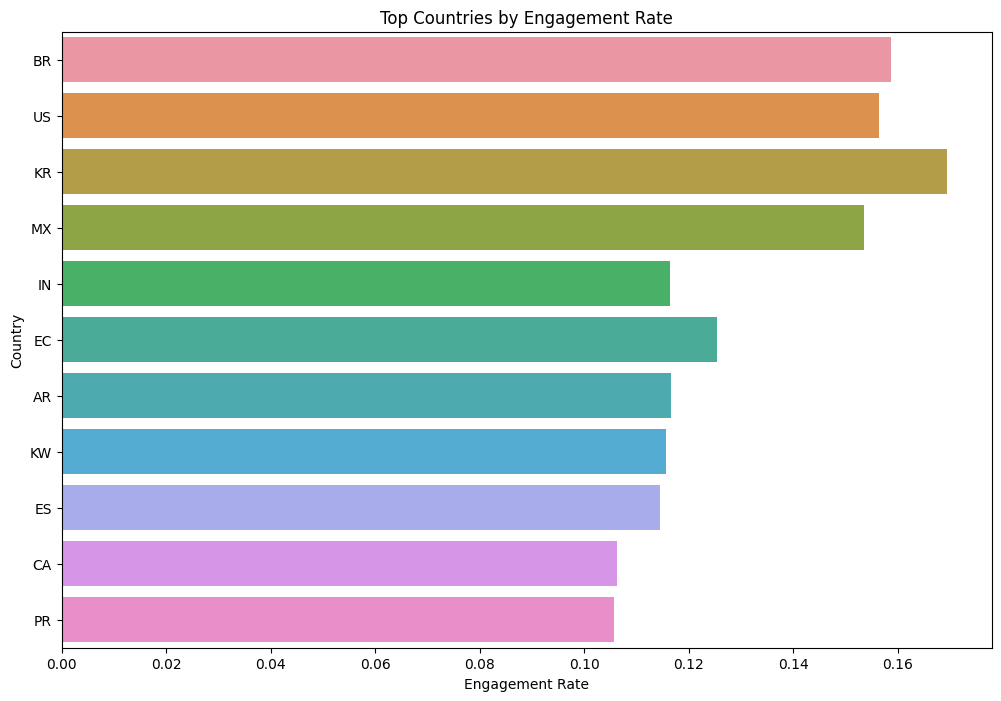

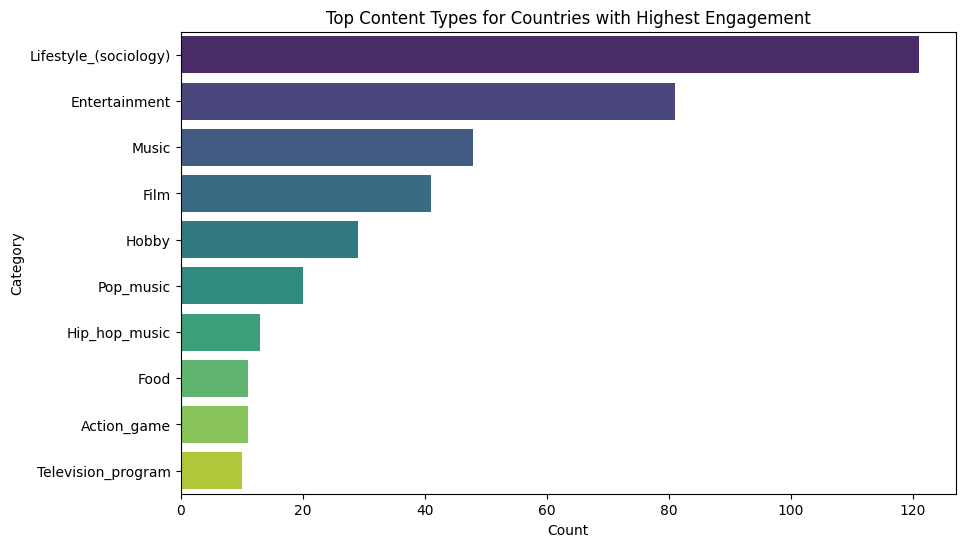

In [7]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



# Calculate mean engagement metrics (Likes, Comments, Visits) by country
country_engagement = data.groupby('Country').agg({
    'Likes': 'mean',
    'Comments': 'mean',
    'Visits': 'mean'
}).reset_index()

# Identify the top 10 countries with the highest mean Likes
top_10_engaging_countries = country_engagement.nlargest(10, 'Likes')

# Create bar plots to visualize the mean engagement metrics for the top 10 countries
plt.figure(figsize=(12, 8))

# Likes bar plot
plt.subplot(3, 1, 1)
sns.barplot(x='Likes', y='Country', data=top_10_engaging_countries, orient='h')
plt.title('Mean Likes by Top 10 Engaging Countries')
plt.xlabel('Mean Likes')
plt.ylabel('Country')

# Comments bar plot
plt.subplot(3, 1, 2)
sns.barplot(x='Comments', y='Country', data=top_10_engaging_countries, orient='h')
plt.title('Mean Comments by Top 10 Engaging Countries')
plt.xlabel('Mean Comments')
plt.ylabel('Country')

# Visits bar plot
plt.subplot(3, 1, 3)
sns.barplot(x='Visits', y='Country', data=top_10_engaging_countries, orient='h')
plt.title('Mean Visits by Top 10 Engaging Countries')
plt.xlabel('Mean Visits')
plt.ylabel('Country')

plt.tight_layout()
plt.show()



# Sort the data by engagement rate in descending order
sorted_data = data.sort_values(by='engagement_rate', ascending=False)

# Identify the top countries with the highest engagement rates based on the existing "engagement_rate" column
top_engagement_rate = sorted_data.nlargest(40, 'engagement_rate')

# Filter the data to include only the entries from the top engagement countries
top_countries_data = data[data['Country'].isin(top_engagement_rate)]

# Create a bar graph to rank the top ten countries by their existing "engagement_rate" column
plt.figure(figsize=(12, 8))
sns.barplot(x='engagement_rate', y='Country', data=top_engagement_rate, ci=None)
plt.xlabel('Engagement Rate')
plt.ylabel('Country')
plt.title('Top Countries by Engagement Rate')
plt.show()



# Identify the top engagement countries
top_engagement_countries = data.nlargest(10, 'engagement_rate')['Country'].tolist()

# Filter the data to include only the entries from the top engagement countries
top_countries_data = data[data['Country'].isin(top_engagement_countries)]

# Calculate the count of each content type within the top countries
content_type_counts = top_countries_data['Categories'].value_counts().reset_index()
content_type_counts.columns = ['Content Type', 'Count']

# Sort the content types by count in descending order
content_type_counts = content_type_counts.sort_values(by='Count', ascending=False)

# Get the top content types
top_three_content_types = content_type_counts.head(10)

# Create a bar graph to visualize the top content types
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Content Type', data=top_three_content_types, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Top Content Types for Countries with Highest Engagement')

plt.show()





In [10]:
%%shell
jupyter nbconvert --to html "/content/ENMHW2Revision.ipynb"

[NbConvertApp] Converting notebook /content/ENMHW2Revision.ipynb to html
[NbConvertApp] Writing 854331 bytes to /content/ENMHW2Revision.html


# **Findings/Conclusion**

We should note first that this database is comprised of the 1000 largest YouTube channels currently. It does not the absolute representation of the trend we are searching for, but a scaled down distribution that helps us inference an answer.

From our correlation heatmap, we can conclude that visits and likes are quite highly correlated; any page with alot of traffic is bound to receive alot of likes. We further find that a similar set of three countries have their aggregation of channels appear as the top average likes, comments, and visits in the dataset, being Kuwait, El Salvador, and Belarus, with El Salvador having a huge drop in mean comments. A relation metric was created in the dataframe for this project named "engagement_rate" that calculates (average likes) / (average visits) for a given YouTube channel and there exists a graph that maps countries by their absolute average channel engagement rate. We find that the countries with the top engagement (like Korea, Brazil, United States, Mexico) are nowhere to be found in the top mean likes/comments/visits graph. From these countries with high engament, we observe that lifestyle, entertainement, and music content are the most popular avenues for these high engagement channels.


Why is this the case? Analyzing entries from counntries with top mean likes/comments/visits, there exists quite a large discrepancy between likes/visits and comments (index 45 to be discarded since its info is incorrect). Additionally, for each of these given countries, there are < 3 channels carrying all their country's "weight" in this dataset.

In [8]:
selected_countries = ['KW', 'BY', 'SV']
filtered_data = data[data['Country'].isin(selected_countries)]
display(filtered_data)

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links,engagement_rate
43,44,A4a4a4a4,Lifestyle_(sociology),47300000,BY,9700000,330400,22000,http://youtube.com/channel/UC2tsySbe9TNrI-xh2l...,0.034062
45,46,Fernanfloo,Entertainment,46500000,SV,0,0,0,http://youtube.com/channel/UCV4xOVpbcV8SdueDCO...,NaN
125,126,AboFlah,Video_game_culture,32700000,KW,3300000,382000,11400,http://youtube.com/channel/UCqq5n-Oe-r1EEHI3yv...,0.115758
303,304,alfredolarin,Entertainment,21900000,SV,12900000,707600,2100,http://youtube.com/channel/UCd5ApCORQsMOZZz5E9...,0.054853
522,523,GLENTYOUTUBE,Role-playing_video_game,16400000,BY,1800000,100900,1800,http://youtube.com/channel/UCBYvr4SqfGQd5fTmOX...,0.056056


This lack of engagment despite high raw counts for other fields may be where questioning colliders may be important. Viewer behavior, an aformentionned collider, may explain these cases. A couple reasons as to why someone could have millions of subsribers yet only a have sometimes less than a thousand comments on a video may be due to a multitude of bots as viewers/subscribers or people in their home country not having access to the YouTube comment section due to national internet policy laws. Additionally, social media prescence in these countries is not as prominent as other larger countries in the datset.

We can conclude that channels with high engagment are less likely to come from countries who are affected by said colliders; additionally these channels tend to produce lifestyle/overall entertainment content.